 @ authors: Ameer Eleyan, Mohammad AbuBader
 
 Date: 1/13/2022   9:43 AM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from mlxtend.evaluate import bias_variance_decomp

In [2]:
# upload training_data_set and testing_data_set, and remove spaces if exists
training_data_set = pd.read_csv('training_dataSet.csv')
training_data_set.replace('(^\s+|\s+$)', '', regex=True, inplace=True)  # to remove spaces

testing_data_set = pd.read_csv('test_dataSet.csv')
testing_data_set.replace('(^\s+|\s+$)', '', regex=True, inplace=True) # to remove spaces 

In [3]:
training_data_set.head()

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,or,eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,good
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,bad
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,bad
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,good
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,good


In [4]:
training_data_set.describe()

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,or,eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8002.0,8002.000000,...,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000,8.002000e+03,8002.000000,8002.000000,8002.000000
mean,60.832417,21.008873,0.147713,2.477381,0.987878,0.022744,0.138340,0.156086,0.0,0.283929,...,0.125594,0.772432,0.437891,0.072107,498.537366,4106.702074,8.603150e+05,0.018120,0.533742,3.223694
std,53.258795,10.997099,0.354838,1.394384,2.092052,0.160404,0.358073,0.784652,0.0,0.972880,...,0.331411,0.419288,0.496158,0.258681,792.845368,3111.940534,2.001843e+06,0.133395,0.498891,2.556097
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,87.250000,1038.500000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,246.000000,4003.000000,2.032500e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,480.000000,7083.000000,3.638982e+05,0.000000,1.000000,5.000000
max,1386.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29725.000000,12873.000000,1.074572e+07,1.000000,1.000000,10.000000


In [5]:
testing_data_set.head()

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,or,eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,115,23,0,2,8,0,0,0,0,0,...,1,0,0,586,7448,3945616,0,0,8,good
1,20,12,0,2,0,0,0,0,0,0,...,1,1,0,100,8311,260730,0,0,4,good
2,35,27,0,1,3,0,0,0,0,0,...,1,0,0,290,74,0,0,1,0,bad
3,59,18,0,2,0,0,0,0,0,0,...,1,1,0,1097,2554,0,0,1,1,bad
4,70,23,0,2,1,0,0,0,0,0,...,1,1,0,318,778,0,0,1,0,bad


In [6]:
#delete rows with zero values(training_data_set)
training_data_set[training_data_set.columns[(training_data_set!=0).any(axis = 0)]]

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,eq,undrscr,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,good
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,bad
2,126,50,1,4,1,0,1,2,3,2,...,1,0,0,14,4004,5828815,0,1,0,bad
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,good
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,good
7998,84,18,0,5,0,1,1,0,1,0,...,1,0,0,211,6728,0,0,1,0,bad
7999,105,16,1,2,6,0,1,0,1,1,...,0,0,0,2809,8515,8,0,1,10,good
8000,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,good


In [7]:
#delete rows with zero values(testing_data_set)
testing_data_set[testing_data_set.columns[(testing_data_set!=0).any(axis = 0)]]

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,eq,undrscr,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,115,23,0,2,8,0,0,0,0,0,...,1,0,0,586,7448,3945616,0,0,8,good
1,20,12,0,2,0,0,0,0,0,0,...,1,1,0,100,8311,260730,0,0,4,good
2,35,27,0,1,3,0,0,0,0,0,...,1,0,0,290,74,0,0,1,0,bad
3,59,18,0,2,0,0,0,0,0,0,...,1,1,0,1097,2554,0,0,1,1,bad
4,70,23,0,2,1,0,0,0,0,0,...,1,1,0,318,778,0,0,1,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,62,27,0,1,1,0,0,0,0,0,...,1,0,0,26,-1,0,0,1,0,bad
3424,44,37,0,2,0,0,0,0,0,0,...,1,0,0,370,7299,5258306,0,0,5,good
3425,42,17,0,3,0,0,0,0,0,0,...,1,1,0,0,6773,182609,0,0,4,good
3426,55,24,0,3,0,0,0,0,0,1,...,0,0,0,0,-1,298112,0,1,4,good


In [8]:
# check if there are no missing values in training_data_set
training_data_set.isnull().values.any()

False

In [153]:
# check if there are no missing values in testing_data_set
testing_data_set.isnull().values.any()

False

In [9]:
# convert status column to zero one (training_data_set)
temp_numarical = training_data_set

df_one = pd.get_dummies(temp_numarical["status"])

df_two = pd.concat((temp_numarical, df_one), axis=1)
 
df_two = df_two.drop(["status"], axis=1)

df_two = df_two.drop(["bad"], axis=1)
# good = 1
# bad = 0
training_data_numarical = df_two.rename(columns={"good": "status"})

In [10]:
# convert status column to zero one (testing_data_set)
temp2_numarical = testing_data_set

df_one = pd.get_dummies(temp2_numarical["status"])

df_two = pd.concat((temp2_numarical, df_one), axis=1)
 
df_two = df_two.drop(["status"], axis=1)

df_two = df_two.drop(["bad"], axis=1)
# good = 1
# bad = 0
testing_data_numarical = df_two.rename(columns={"good": "status"})

# Start feature selection process

In [11]:
pd.set_option('display.max_columns', 90)
# display corr between all independent variables with target variables(status)
corr_df = training_data_numarical.corr()[-1:]
corr_df

,l_url,l_hostname,ip,dots,hyphens,at,qm,and,or,eq,undrscr,tilde,prcnt,slsh,star,colon,comma,semicolumn,dollar,space,www,com,dslash,http_in_path,https_token,digits_url_ratio,digits_host_ratio,punycode,port,tld_in_path,tld_in_subdomain,abnrml_subdomain,subdomains,prefix_suffix,random_domain,shortening_service,path_extension,redirection,external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
status,-0.250505,-0.23387,-0.320613,-0.200853,0.107949,-0.141838,-0.285949,-0.166494,NaN,-0.225649,-0.033418,-0.034237,-0.022932,-0.243088,-0.019371,-0.090506,-0.009721,-0.099838,-0.022221,0.005207,0.442888,-0.150191,-0.067546,-0.067103,-0.099432,-0.3544,-0.223204,-0.019371,0.002878,-0.08048,-0.203523,-0.12505,-0.108936,-0.216763,-0.02394,-0.107458,0.011177,0.026404,-0.059272,-0.181619,-0.007314,0.028408,-0.22586,-0.071887,-0.202386,-0.127049,-0.21221,-0.178367,-0.196664,-0.200788,-0.332189,0.088875,-0.064367,-0.063809,-0.10911,-0.143923,0.338497,0.245597,-0.090482,NaN,0.081786,NaN,0.147368,NaN,0.030695,0.033871,0.147418,0.184486,NaN,0.185018,0.142334,NaN,0.003364,0.058907,0.178483,0.01414,-0.003113,-0.201091,-0.341749,0.168545,-0.06336,0.155426,0.328191,-0.055593,-0.115271,-0.724989,0.498888,1.0


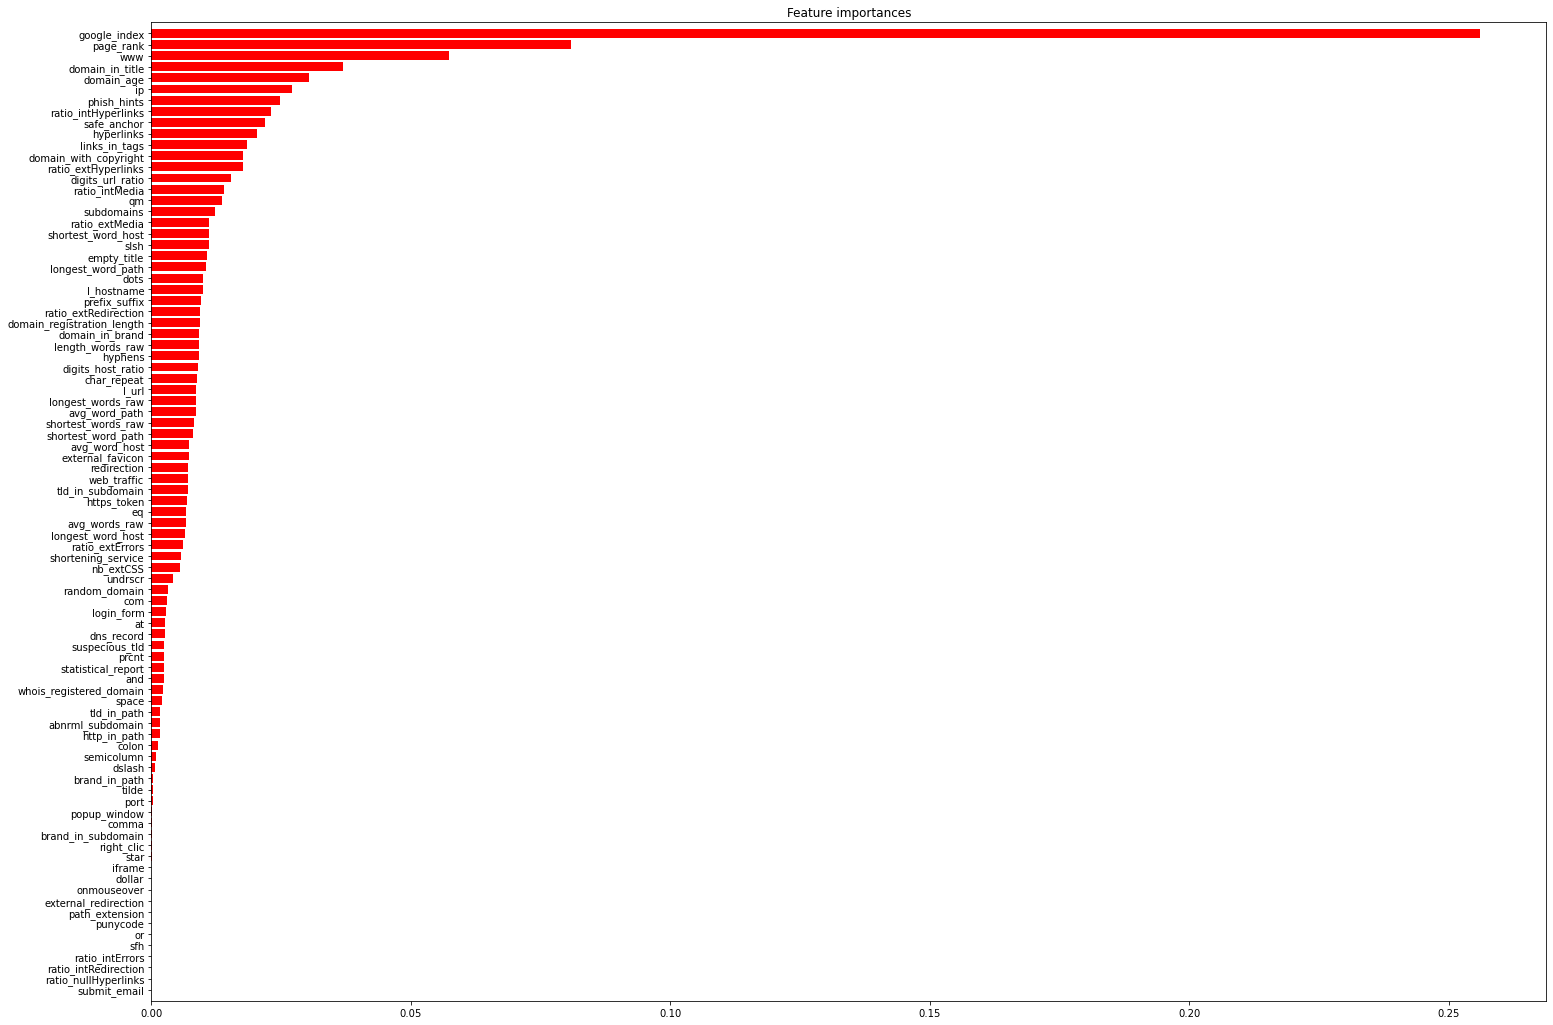

In [12]:
X = testing_data_numarical.iloc[:,0:87]  #independent columns
y = testing_data_numarical.iloc[:,-1]    #target column status

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=500,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)

#change indices to a list of labels
labels=[]
for i in indices:    
    labels.append(training_data_set.columns[i])


# Plot the feature importances of the forest
plt.figure(figsize=(25,18))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")

plt.yticks(range(X.shape[1]), labels)
plt.ylim([-1, X.shape[1]])
plt.savefig('saved_figure.png')
plt.show()


In [13]:
# Based on the above two results, we decided to delete these feature
unmunnecessary_features = ['and','whois_registered_domain','space','tld_in_path','abnrml_subdomain','http_in_path','colon','semicolumn' ,'dslash','brand_in_path','tilde','port','popup_window','right_clic','iframe','brand_in_subdomain','path_extension','comma','onmouseover','external_redirection','punycode',
         'dollar','star','ratio_intRedirection','ratio_nullHyperlinks','or','ratio_intErrors','sfh','submit_email']

In [14]:
# dropped them from training_data_set
training_data_after_cleaning = training_data_numarical.drop(unmunnecessary_features, axis=1)

# dropped them from testing_data_set
testing_data_after_cleaning = testing_data_numarical.drop(unmunnecessary_features, axis=1)

In [15]:
training_data_after_cleaning.head()

,l_url,l_hostname,ip,dots,hyphens,at,qm,eq,undrscr,prcnt,slsh,www,com,https_token,digits_url_ratio,digits_host_ratio,tld_in_subdomain,subdomains,prefix_suffix,random_domain,shortening_service,redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,suspecious_tld,statistical_report,hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,3,1,0,1,0.000000,0.0,0,3,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,100.000000,0.000000,0.0,0,0,1,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,5,0,0,1,0.220779,0.0,0,1,0,0,0,1,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,100.0,0,1,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,3,2,0,5,0,1,0,0.150794,0.0,1,3,1,0,0,1,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,100.0,0,1,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,2,0,0,1,0.000000,0.0,0,2,0,0,0,1,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,96.428571,3.571429,62.5,0,1,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,5,1,0,1,0.000000,0.0,0,2,0,0,0,1,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0.000000,100.000000,0.0,0,0,1,224,8175,8725,0,0,6,1


In [16]:
training_data_after_cleaning.duplicated().sum()

96

In [17]:
# delete duplicated raws from training_data_after_cleaning
training_data_after_cleaning.drop_duplicates(inplace = True)

In [18]:
training_data_after_cleaning.duplicated().sum()

0

In [19]:
testing_data_after_cleaning.duplicated().sum()

21

In [20]:
# delete duplicated raws from testing_data_after_cleaning
testing_data_after_cleaning.drop_duplicates(inplace = True)

In [170]:
testing_data_after_cleaning.duplicated().sum()

0

In [21]:
training_data_after_cleaning.shape

(7906, 59)

In [22]:
testing_data_after_cleaning.shape

(3407, 59)

In [23]:
# getting some informations about the dataset
training_data_after_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8001
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   l_url                       7906 non-null   int64  
 1   l_hostname                  7906 non-null   int64  
 2   ip                          7906 non-null   int64  
 3   dots                        7906 non-null   int64  
 4   hyphens                     7906 non-null   int64  
 5   at                          7906 non-null   int64  
 6   qm                          7906 non-null   int64  
 7   eq                          7906 non-null   int64  
 8   undrscr                     7906 non-null   int64  
 9   prcnt                       7906 non-null   int64  
 10  slsh                        7906 non-null   int64  
 11  www                         7906 non-null   int64  
 12  com                         7906 non-null   int64  
 13  https_token                 7906 

In [24]:
# define X features and y
X = training_data_after_cleaning.iloc[:,0:58]  #independent columns
y = training_data_after_cleaning.iloc[:,-1]    #target column status

# Support vector machines model

In [185]:
#define support vector machines model
svm_model = svm.SVC()

svm_model.fit(X, y)

# predict testing_data
svm_prd = svm_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [186]:
# score for this model
print('SVM Model score: %.1f' % (svm_model.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,svm_prd)
print('SVM Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,svm_prd)
print('SVM Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,svm_prd)
print('SVM Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,svm_prd)
print('SVM F1 score: %.1f' % (f1*100))


SVM Model score: 59.8
SVM Accuracy: 59.0
SVM Precision: 71.2
SVM Recall: 30.9
SVM F1 score: 43.1


# Logistic regression model

In [183]:
# define logistic regression model
logreg_model = linear_model.LogisticRegression(max_iter=5000)

# fit the model with data
logreg_model.fit(X,y)
logreg_prd = logreg_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [184]:
# score for this model
print('Log_Reg Model score: %.1f' % (logreg_model.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,logreg_prd)
print('Log_Reg Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,logreg_prd)
print('Log_Reg Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,logreg_prd)
print('Log_Reg Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,logreg_prd)
print('Log_Reg F1 score: %.1f' % (f1*100))


Log_Reg Model score: 78.4
Log_Reg Accuracy: 79.0
Log_Reg Precision: 80.1
Log_Reg Recall: 77.3
Log_Reg F1 score: 78.7


# Decisions tree model

In [181]:
# define decisions tree model
tree_model = tree.DecisionTreeClassifier(criterion='gini')

tree_model.fit(X,y)

tree_prd = tree_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [182]:
# score for this model
print('Tree Model score: %.1f' % (tree_model.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,tree_prd)
print('Tree Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,tree_prd)
print('Tree Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,tree_prd)
print('Tree Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,tree_prd)
print('Tree F1 score: %.1f' % (f1*100))


Tree Model score: 100.0
Tree Accuracy: 93.8
Tree Precision: 93.4
Tree Recall: 94.3
Tree F1 score: 93.8


# Naive_bayes model

In [179]:
# define naive_bayes model
naive_model = GaussianNB()
naive_model.fit(X,y)
naive_pred = naive_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [180]:
# score for this model
print('NB Model score: %.1f' % (naive_model.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,naive_pred)
print('NB Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,naive_pred)
print('NB Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,naive_pred)
print('NB Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,naive_pred)
print('NB F1 score: %.1f' % (f1*100))


NB Model score: 74.7
NB Accuracy: 74.6
NB Precision: 83.5
NB Recall: 61.6
NB F1 score: 70.9


# KNN model

In [177]:
# deinfe KNN model
knn_model = KNeighborsClassifier(n_neighbors =10)
knn_model.fit(X, y)
knn_pred = knn_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [178]:
# score for this model
print('KNN Model score: %.1f' % (knn_model.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,knn_pred)
print('KNN Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,knn_pred)
print('KNN Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,knn_pred)
print('KNN Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,knn_pred)
print('KNN F1 score: %.1f' % (f1*100))

KNN Model score: 84.8
KNN Accuracy: 81.9
KNN Precision: 85.4
KNN Recall: 77.1
KNN F1 score: 81.0


# Random forest model

In [25]:
#define random force model
ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
ranfor.fit(X, y)
ranfor_prd = ranfor.predict(testing_data_after_cleaning.iloc[:,0:58])

In [26]:
print('RF Model score: %.1f' % (ranfor.score(X,y)*100))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,ranfor_prd)
print('RF Accuracy: %.1f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,ranfor_prd)
print('RF Precision: %.1f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,ranfor_prd)
print('RF Recall: %.1f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,ranfor_prd)
print('RF F1 score: %.1f' % (f1*100))

RF Model score: 100.0
RF Accuracy: 96.7
RF Precision: 96.9
RF Recall: 96.5
RF F1 score: 96.7


# AdaBoosting model

In [27]:
# define Bossting model
bossting_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3,max_depth=4,random_state=5)

bossting_model.fit(X,y)

bossting_prd = bossting_model.predict(testing_data_after_cleaning.iloc[:,0:58])

In [28]:
# score for this model
print('Final Training Accuracy: %.1f '% (bossting_model.score(X,y)*100),'%')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testing_data_after_cleaning.status,bossting_prd)
print('GD Accuracy: %.1f' % (accuracy*100),'%')
# precision tp / (tp + fp)
precision = precision_score(testing_data_after_cleaning.status,bossting_prd)
print('GD Precision: %.1f' % (precision*100),'%')
# recall: tp / (tp + fn)
recall = recall_score(testing_data_after_cleaning.status,bossting_prd)
print('GD Recall: %.1f' % (recall*100),'%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testing_data_after_cleaning.status,bossting_prd)
print('GD F1 score: %.1f' % (f1*100),'%')

Final Training Accuracy: 100.0  %
GD Accuracy: 97.1 %
GD Precision: 97.2 %
GD Recall: 97.0 %
GD F1 score: 97.1 %


# Visualize for actual values and predicted values

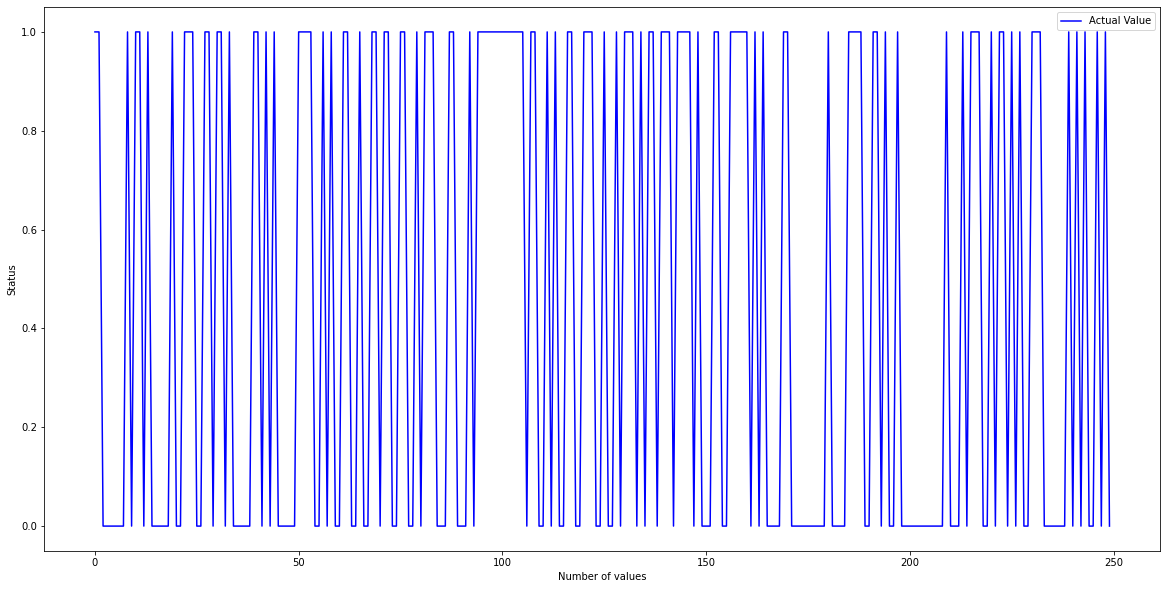

In [72]:
plt.rcParams['figure.figsize'] = [20, 10]  # resize the plot
plt.plot(testing_data_after_cleaning.status.iloc[0:250], color='blue')
plt.xlabel('Number of values')
plt.ylabel('Status')
plt.legend(['Actual Value'])
plt.show()


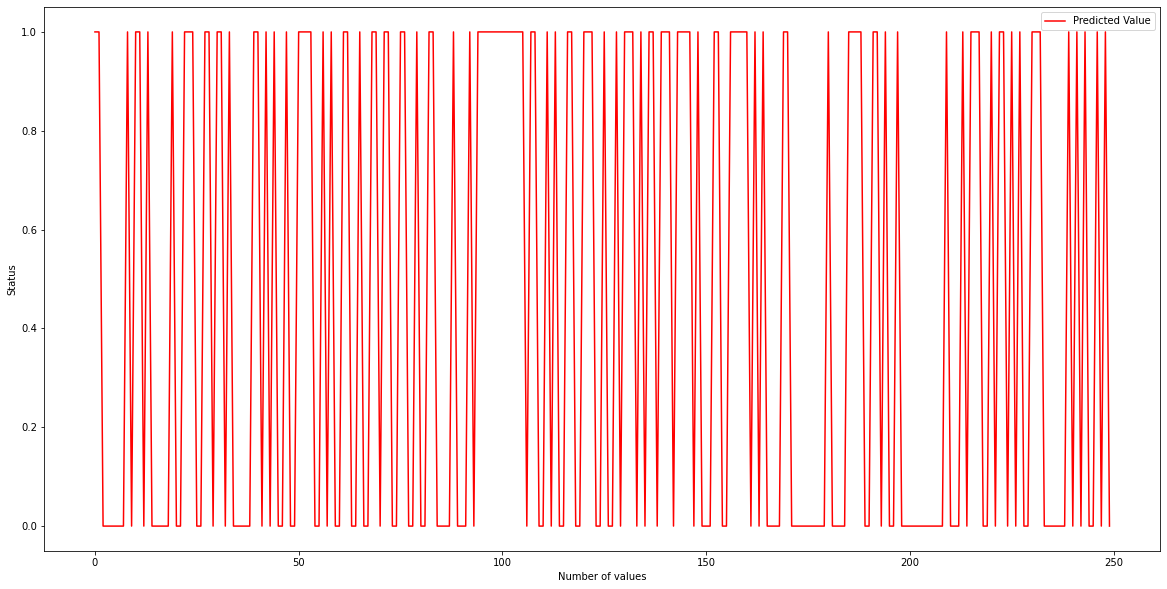

In [73]:
plt.plot(bossting_prd[0:250], color='red')
plt.xlabel('Number of values')
plt.ylabel('Status')
plt.legend(['Predicted Value'])
plt.show()


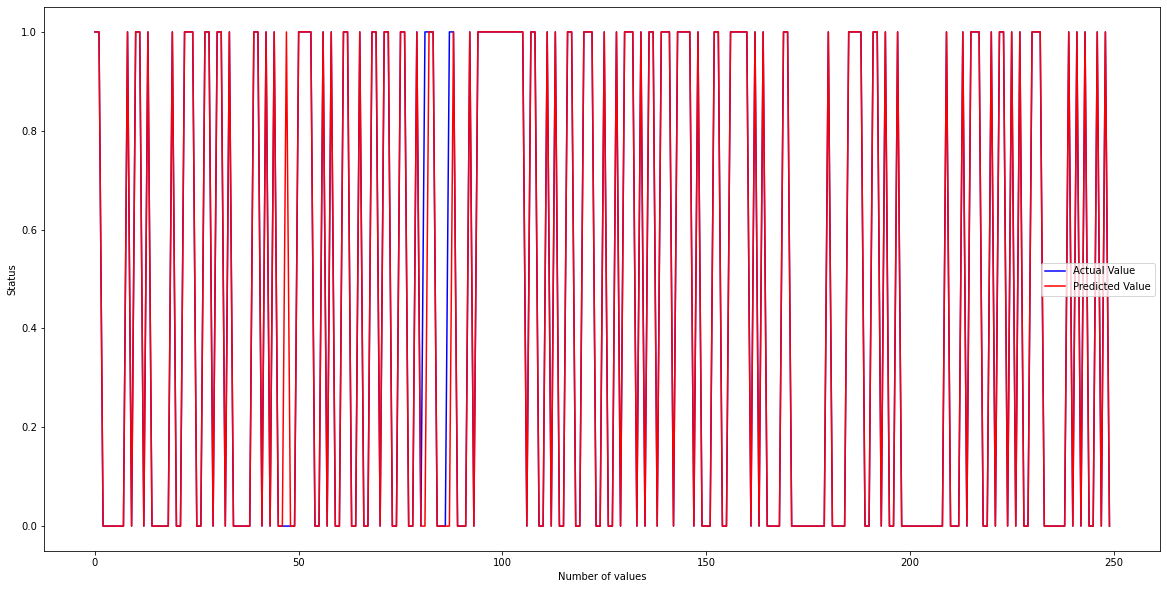

In [74]:
plt.plot(testing_data_after_cleaning.status.iloc[0:250], color='blue')
plt.plot(bossting_prd[0:250], color='red')
plt.xlabel('Number of values')
plt.ylabel('Status')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [190]:
# estimate bias and variance
mse, bias, var = bias_variance_decomp(bossting_model, X.to_numpy(), y.to_numpy(), (testing_data_after_cleaning.iloc[:,0:58]).to_numpy(), (testing_data_after_cleaning.iloc[:,-1]).to_numpy(), loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.035
Bias: 0.026
Variance: 0.009


# So, The GradientBoostingClassifier is the best model and is a good balance